# Descision Trees - GlobalAIHub

📌 **Decision Tree** algorithms are a series of if-else statements, that can be used to predict a result based on data. Simply put, it randomly asks questions, checks if the dataset is divided correctly and changes the questions accordingly.

📌 A decision tree algorithm creates a decision tree with the right series of questions or comparisons. These will lead to the right result, which could be a prediction or category. A decision tree is also described as a series of so-called **“nodes”**. The starting point of the tree is called a **root** or **top node**, then we have a set of decision nodes until we reach the **leaf node**. The leaf is our result, our final category or prediction.

📌 Generally, decision tree algorithms are more suitable for classification problems, however, regression trees are very useful if there are strong distinctions between the different cases. This is because the logic of decision based algorithms is categorical, that’s why it’s closer to classification problems. Predicting the output of continuous values, which is the case in regression problems, is harder based on decisions. And there are other things that we should consider when using decision trees. We already mentioned that decision trees ask questions and split data according to these. Based on the questions, we will calculate the information gain.

📌 **Information gain** is the measure of how much information a question gives about a class. If a question splits the dataset better than the other one, that question will be used.

📌 For decision trees, we can perform an operation called **“pruning”**. *Pruning* is basically removing some unnecessary features based on the information gain, in order to get a less complex decision tree. Pruning helps to prevent overfitting, and high variance so that our model generalizes well to unseen data.

📌 The performance of the decision tree is measured just like any other ML algorithm.We use the **confusion matrix**, **accuracy score**, **f1-score** for *classification trees*. And **RMSE**, **MSE** for *regression trees*. We can compare the performance of other models, by comparing the results of their metrics with results we get from decision trees, and choose the optimal model that fits the problem we are trying to solve.

📌 So, what are the main advantages of decision trees? Compared to other algorithms, decision trees take less effort to prepare data and there is no need to normalize and scale it. Missing values in the data don’t significantly affect the process of creating a decision tree. But there are of course some disadvantages. Even though decision trees have many advantages, they require longer time to train. Another problem is that decision trees are unstable. Slight changes in the data can result in an entirely different tree being constructed. Also, decision trees tend to overfit for complicated data, which is why they may not generalize the input well.

📌 Indeed, **overfitting is a huge problem**. This is where another algorithm, **random forest**, based on decision trees comes into play. The approach with random forest is that, instead of using only one tree, it uses many trees. It runs a test dataset on each tree, gets predictions from each and based on the majority votes, that means the category that appears the most, we get a final output. But with many trees, we need many datasets. Since we already have a dataset, we can easily divide it into smaller ones, and use each of these sets for random forest trees. Since each tree focuses on different parts of the dataset, this prevents overfitting.

📌 Now we import the example dataset, then we divide our dataset into features, X and targets, y. Then, we split them into train and test datasets.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
dataset = pd.read_csv("titanic.csv")
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,0,38.0,1,0,71.2833,0
1,1,1,0,35.0,1,0,53.1000,2
2,0,1,1,54.0,0,0,51.8625,2
3,1,3,0,4.0,1,1,16.7000,2
4,1,1,0,58.0,0,0,26.5500,2


In [ ]:
X = dataset.drop("Survived", axis=1)
y = dataset.loc[:,"Survived"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

📌 Let’s use a decision tree and random forest classifier on the training dataset!

In [ ]:
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()

In [ ]:
decisiontree.fit(X_train, y_train)
randomforest.fit(X_train, y_train)

RandomForestClassifier()

📌 You can see the features and splitting values used on each of the nodes of the decision tree. This process goes on until the decision tree converges on a best performing solution. The nodes at the bottom tell us that this tree goes deeper, as we only wanted to see the first three layers. Finally, we are ready to make predictions using the test dataset.

In [ ]:
decisiontree_pred = decisiontree.predict(X_test)
randomforest_pred = randomforest.predict(X_test)

📌 Now, how can we compare the two models? Yes, we can use performance metrics! And since we are handling a classification problem, metrics we’ll use are precision score, recall score, f1-score and accuracy. By showing the classification report, we’ll be able to see these scores and make a comparison between the performances of these two algorithms. Let’s print out the classification reports and see the difference. By observing these classification reports, we can see the difference between the performances of these two models. We have higher precisions, recalls and f1-scores for the predictions of the random forest classifiers, therefore it is performing better.

In [ ]:
print(classification_report(y_test, decisiontree_pred))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        14
           1       0.92      0.85      0.89        41

    accuracy                           0.84        55
   macro avg       0.78      0.82      0.80        55
weighted avg       0.85      0.84      0.84        55



In [ ]:
print(classification_report(y_test, randomforest_pred))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62        14
           1       0.88      0.85      0.86        41

    accuracy                           0.80        55
   macro avg       0.74      0.75      0.74        55
weighted avg       0.80      0.80      0.80        55



📌 We import plot_tree from sklearn and matplotlib. As the name suggests, plot_tree will allow us to plot the decision tree. You can also see that we adjust many arguments inside the function. These help us to get a better visualization and filter the information that is shown. For example, the argument “max_depth” is set to 2, this specifies that only the first three layers of the tree should be shown. You can check out the documentation of **plot_tree** to learn more about these arguments. And finally we can display the plot.

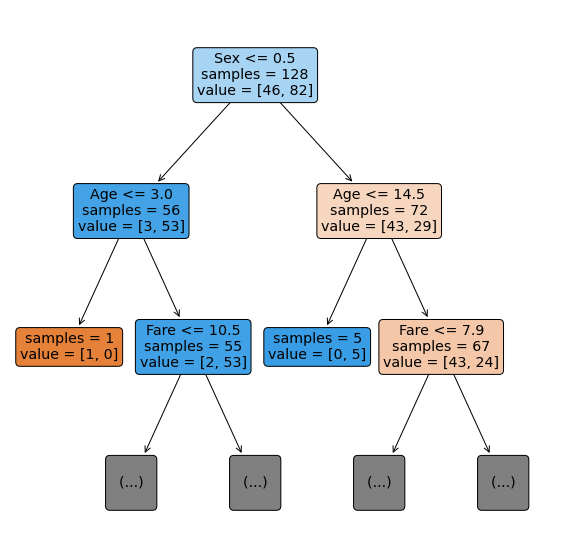

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plot_tree(decisiontree,
          max_depth=2,
          feature_names=X.columns,
          filled=True,
          impurity=False,
          rounded=True,
          precision=1)

plt.show()